In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 

def coverage_and_width(low, up, y_test):
    width = up - low
    coverage = np.mean((low <= y_test) & (y_test <= up))
    return width.mean(), coverage.mean()

def boundary_adjustment(value, label_set, threshold=0):
    threshold_max = (label_set[-1] - label_set[0]) / (len(label_set) - 1) / 2
    threshold = min(threshold_max, threshold)
    adjusted_value = next((num for num in label_set if abs(num - value) <= threshold+0.01), value)
    
    return adjusted_value



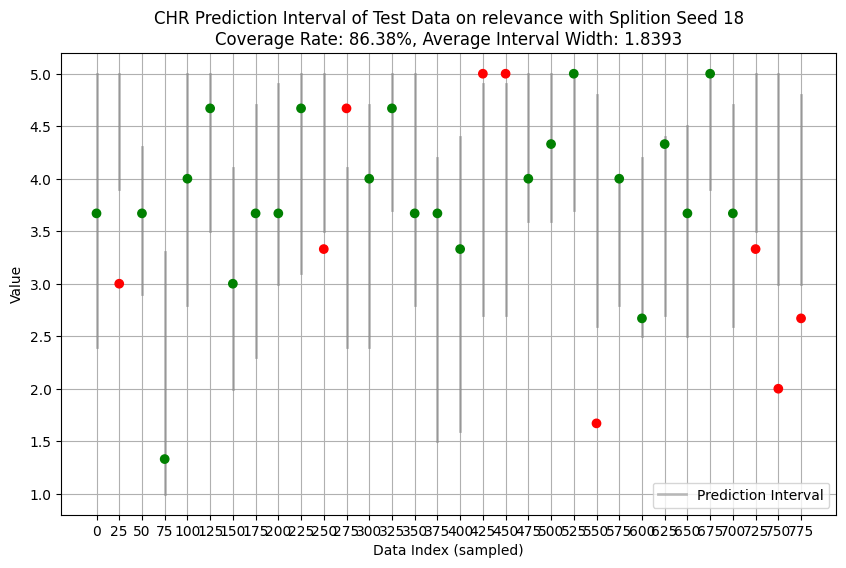

In [2]:
model = "dsr1"
method = "CHR"
dataset = "Summeval"
dimension = "relevance"
seed = 18
adjustment = 0

if dataset == 'Summeval' or dataset == 'Dialsumm':
        dimensions = ['consistency', 'coherence', 'fluency', 'relevance']
        label_set = np.array([1, 1.33, 1.67, 2, 2.33, 2.67, 3, 3.33, 3.67, 4, 4.33, 4.67, 5])
elif dataset == 'GEval' or dataset == 'SocREval':
        dimensions = ['cosmos', 'drop', 'esnli', 'gsm8k']
        label_set = np.array([1, 2, 3, 4, 5])

directory = os.getcwd()
file_name = f"{method}_{dataset}_{dimension}_{seed}.csv"
file_path = file_path = os.path.join(directory, "interval_results", model, method, file_name)

data = pd.read_csv(file_path)
data = data.round(2)
data['low'] = data['low'].apply(lambda x: boundary_adjustment(x, label_set, adjustment))
data['up'] = data['up'].apply(lambda x: boundary_adjustment(x, label_set, adjustment))

width, coverage = coverage_and_width(data['low'], data['up'], data['y_test'])

in_interval = (data['low'] <= data['y_test']) & (data['y_test'] <= data['up'])

# Plotting
x = np.arange(len(data['y_test']))
colors = np.where(in_interval, 'green', 'red')

sample_rate = 25
x_sampled = x[::sample_rate]
y_sampled = data['y_test'][::sample_rate]
y_qlow_sampled = data['low'][::sample_rate]
y_qup_sampled = data['up'][::sample_rate]
colors_sampled = colors[::sample_rate]

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(x_sampled)):
    ax.plot([x_sampled[i], x_sampled[i]], [y_qlow_sampled.iloc[i], y_qup_sampled.iloc[i]], color='gray', linewidth=2, alpha=0.5)

ax.scatter(x_sampled, y_sampled, color=colors_sampled, label='True Value', zorder=5)

ax.set_title(f'{method} Prediction Interval of Test Data on {dimension} with Splition Seed {seed}\nCoverage Rate: {coverage:.2%}, Average Interval Width: {width:.4f}')
ax.set_xlabel('Data Index (sampled)')
ax.set_ylabel('Value')

ax.set_xticks(np.arange(0, len(x), step=sample_rate))

ax.legend(['Prediction Interval'])
plt.grid(True)

plt.show()

C:\Users\huanx\AppData\Local\Temp\ipykernel_9152\1366701776.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


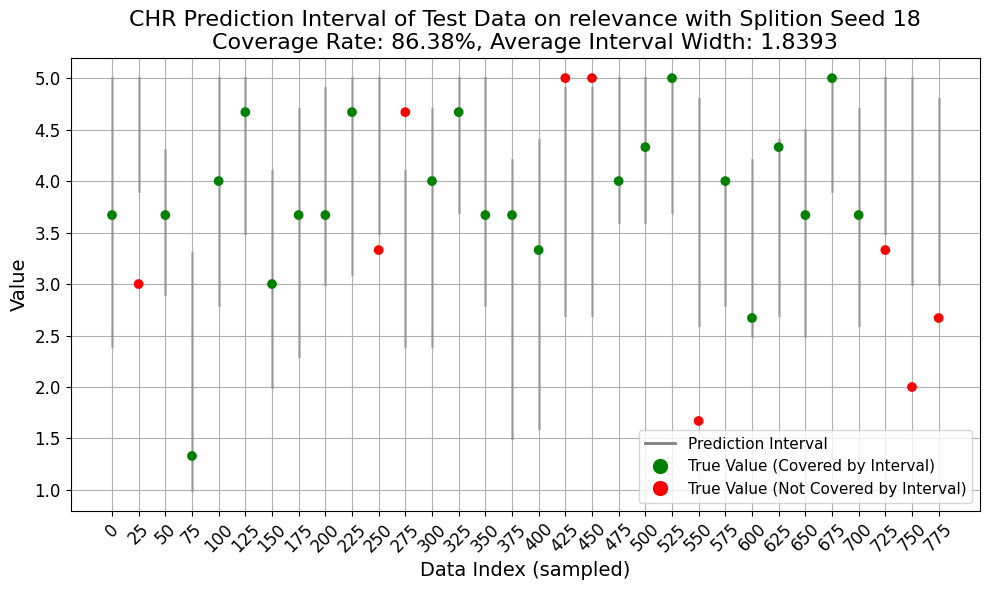

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(x_sampled)):
    ax.plot([x_sampled[i], x_sampled[i]], [y_qlow_sampled.iloc[i], y_qup_sampled.iloc[i]], color='gray', linewidth=2, alpha=0.5)

ax.scatter(x_sampled, y_sampled, color=colors_sampled, zorder=5)

ax.set_title(f'{method} Prediction Interval of Test Data on {dimension} with Splition Seed {seed}\nCoverage Rate: {coverage:.2%}, Average Interval Width: {width:.4f}', fontsize=16)
ax.set_xlabel('Data Index (sampled)', fontsize=14)
ax.set_ylabel('Value', fontsize=14)

ax.set_xticks(np.arange(0, len(x), step=sample_rate))
ax.set_xticklabels(ax.get_xticks(), rotation=45, fontsize=12) 
ax.set_yticklabels(ax.get_yticks(), fontsize=12) 

legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='True Value (Covered by Interval)', markerfacecolor='green', markersize=12),
    Line2D([0], [0], marker='o', color='w', label='True Value (Not Covered by Interval)', markerfacecolor='red', markersize=12)
]

ax.legend([Line2D([0], [0], color='gray', lw=2, label='Prediction Interval')] + legend_handles, 
          ['Prediction Interval', 'True Value (Covered by Interval)', 'True Value (Not Covered by Interval)'], 
          fontsize=11)

plt.grid(True)
plt.tight_layout()
plt.show()

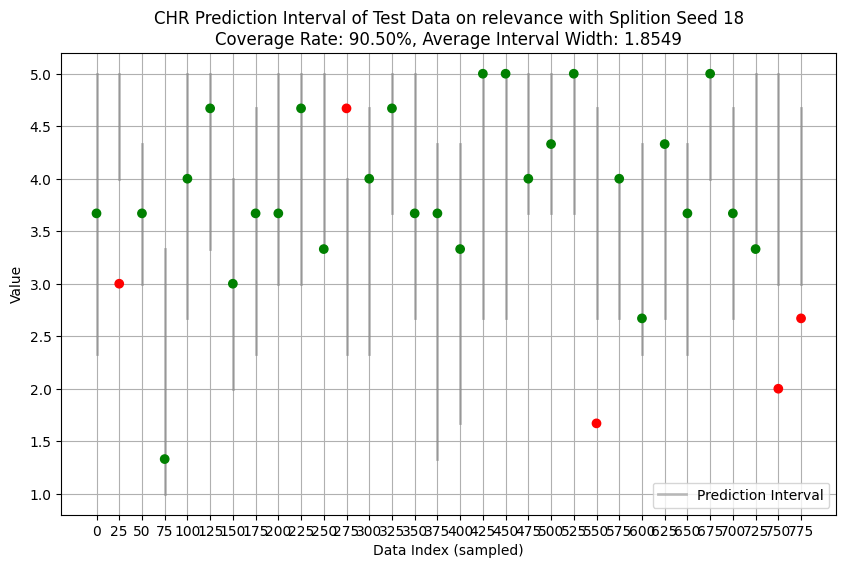

In [4]:
model = "dsr1"
method = "CHR"
dataset = "Summeval"
dimension = "relevance"
seed = 18
adjustment = 0.5

if dataset == 'Summeval' or dataset == 'Dialsumm':
        dimensions = ['consistency', 'coherence', 'fluency', 'relevance']
        label_set = np.array([1, 1.33, 1.67, 2, 2.33, 2.67, 3, 3.33, 3.67, 4, 4.33, 4.67, 5])
elif dataset == 'GEval' or dataset == 'SocREval':
        dimensions = ['cosmos', 'drop', 'esnli', 'gsm8k']
        label_set = np.array([1, 2, 3, 4, 5])

directory = os.getcwd()
file_name = f"{method}_{dataset}_{dimension}_{seed}.csv"
file_path = file_path = os.path.join(directory, "interval_results", model, method, file_name)

data = pd.read_csv(file_path)
data = data.round(2)
data['low'] = data['low'].apply(lambda x: boundary_adjustment(x, label_set, adjustment))
data['up'] = data['up'].apply(lambda x: boundary_adjustment(x, label_set, adjustment))

width, coverage = coverage_and_width(data['low'], data['up'], data['y_test'])

in_interval = (data['low'] <= data['y_test']) & (data['y_test'] <= data['up'])

# Plotting
x = np.arange(len(data['y_test']))
colors = np.where(in_interval, 'green', 'red')

sample_rate = 25
x_sampled = x[::sample_rate]
y_sampled = data['y_test'][::sample_rate]
y_qlow_sampled = data['low'][::sample_rate]
y_qup_sampled = data['up'][::sample_rate]
colors_sampled = colors[::sample_rate]

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(x_sampled)):
    ax.plot([x_sampled[i], x_sampled[i]], [y_qlow_sampled.iloc[i], y_qup_sampled.iloc[i]], color='gray', linewidth=2, alpha=0.5)

ax.scatter(x_sampled, y_sampled, color=colors_sampled, label='True Value', zorder=5)

ax.set_title(f'{method} Prediction Interval of Test Data on {dimension} with Splition Seed {seed}\nCoverage Rate: {coverage:.2%}, Average Interval Width: {width:.4f}')
ax.set_xlabel('Data Index (sampled)')
ax.set_ylabel('Value')

ax.set_xticks(np.arange(0, len(x), step=sample_rate))

ax.legend(['Prediction Interval'])
plt.grid(True)

plt.show()

C:\Users\huanx\AppData\Local\Temp\ipykernel_9152\1366701776.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


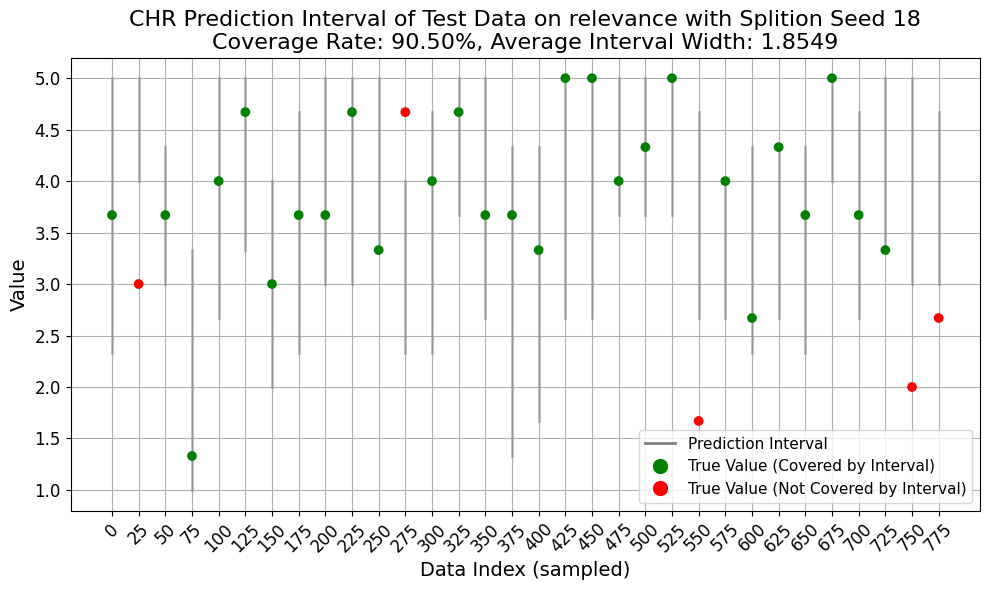

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(x_sampled)):
    ax.plot([x_sampled[i], x_sampled[i]], [y_qlow_sampled.iloc[i], y_qup_sampled.iloc[i]], color='gray', linewidth=2, alpha=0.5)

ax.scatter(x_sampled, y_sampled, color=colors_sampled, zorder=5)

ax.set_title(f'{method} Prediction Interval of Test Data on {dimension} with Splition Seed {seed}\nCoverage Rate: {coverage:.2%}, Average Interval Width: {width:.4f}', fontsize=16)
ax.set_xlabel('Data Index (sampled)', fontsize=14)
ax.set_ylabel('Value', fontsize=14)

ax.set_xticks(np.arange(0, len(x), step=sample_rate))
ax.set_xticklabels(ax.get_xticks(), rotation=45, fontsize=12) 
ax.set_yticklabels(ax.get_yticks(), fontsize=12) 

legend_handles = [
    Line2D([0], [0], marker='o', color='w', label='True Value (Covered by Interval)', markerfacecolor='green', markersize=12),
    Line2D([0], [0], marker='o', color='w', label='True Value (Not Covered by Interval)', markerfacecolor='red', markersize=12)
]

ax.legend([Line2D([0], [0], color='gray', lw=2, label='Prediction Interval')] + legend_handles, 
          ['Prediction Interval', 'True Value (Covered by Interval)', 'True Value (Not Covered by Interval)'], 
          fontsize=11)

plt.grid(True)
plt.tight_layout()
plt.show()